In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#PARÁMETROS FÍSICOS
L = 5.0 #longitud del dominio; si es grande para que el calor se transfiera va a ser más lento?
K = 0.02 #conductividad; si es chica, la transferencia de calor es pequeña
S = 0 
TA = 200
TB = 1000

In [4]:
#PARÁMETROS NUMÉRICOS
N = 4 # número de nodos
h = L/(N+1) #espacios entre nodos

In [5]:
T = np.zeros(N+2)
b = np.zeros(N)
A = np.zeros((N,N)) 

In [6]:
r = K / h**2
b[:] = S / r #[:] es para ponérselo a todos los elementos del vector
T[0] = TA
T[-1] = TB
b[0] += TA
b[-1] += TB

In [7]:
b

array([ 200.,    0.,    0., 1000.])

In [9]:
for i in range (1, N-1):
    A [i,i] = 2
    A[i,i+1] = -1
    A[i,i-1] = -1
A[0,0] = 2
A[0,1] = -1
A[-1,-2] =-1 #último renglón penúltima columna
A[-1,-1] = 2

In [10]:
A

array([[ 2., -1.,  0.,  0.],
       [-1.,  2., -1.,  0.],
       [ 0., -1.,  2., -1.],
       [ 0.,  0., -1.,  2.]])

In [11]:
T[1:N+1] =np.linalg.solve(A,b)

In [12]:
T

array([ 200.,  360.,  520.,  680.,  840., 1000.])

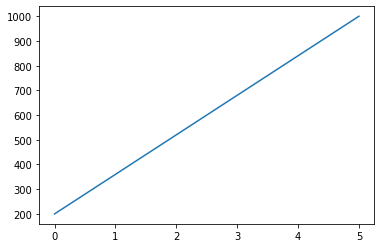

In [13]:
plt.plot(T)

In [19]:
def conducción_1d(k,S,L,TA,TB,N):
    """
    Parameters
    ----------
    
    L:float
    L es la longitud del dominio
    
    K: float
    Es la conductividad del material
    
    S:float
    Es la fuente
    
    TA: float
    Es la condición de frontera a la izquierda
    
    TB: float 
    Es la condición de frontera a la derecha
    
    N:int
    Es el número de nodos internos(gardo de libertad)
    
    Return
    -------
    Al final esta función dibuja la solución
    """

    h = L/(N+1) 

    T = np.zeros(N+2)
    b = np.zeros(N)
    A = np.zeros((N,N)) 

    r = K / h**2
    b[:] = S / r 
    T[0] = TA
    T[-1] = TB
    b[0] += TA
    b[-1] += TB

    for i in range (1, N-1):
        A [i,i] = 2
        A[i,i+1] = -1
        A[i,i-1] = -1
    A[0,0] = 2
    A[0,1] = -1
    A[-1,-2] =-1
    A[-1,-1] = 2

    T[1:N+1] =np.linalg.solve(A,b)

    plt.plot(T, 'o-')

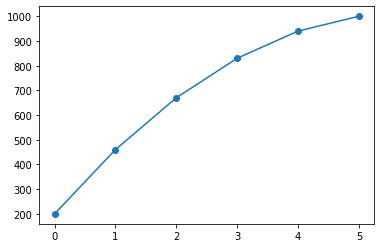

In [20]:
conducción_1d(0.02,1.0,5.0,200,1000,4)

In [21]:
import ipywidgets as widgets

In [22]:
w = widgets.interactive(conducción_1d,
                        k = widgets.fixed(0.02),
                        S =widgets.FloatSlider(max=1.,min=0.0,value=0,step=0.2),
                        L =widgets.fixed(5.0),
                        TA = widgets.fixed(200),
                        TB =widgets.fixed(1000),
                        N= widgets.IntSlider(max=10, min=4, value=4))

In [23]:
display(w)

interactive(children=(FloatSlider(value=0.0, description='S', max=1.0, step=0.2), IntSlider(value=4, descripti…